In [17]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
plt.style.use('seaborn-white')

In [18]:
directory = '../../../data/raw/ucx_tests/results'

In [19]:
get_df = pd.read_csv(directory + "/" + "get_client.csv", skiprows=1)
put_bw_df = pd.read_csv(directory + "/" + "put_bw_client.csv", skiprows=1)
put_lat_df = pd.read_csv(directory + "/" + "put_lat_client.csv", skiprows=1)
stream_bw_df = pd.read_csv(directory + "/" + "stream_bw_client.csv", skiprows=1)
stream_lat_df = pd.read_csv(directory + "/" + "stream_lat_client.csv", skiprows=1)

In [20]:
def testname_to_cols(dataframe):
    df = dataframe.iloc[:, 0].str.extract(r'([a-zA-Z]+)_(?:[a-zA-Z]+_)?(\d+)')
    dataframe["operation"] = df[0]
    dataframe["message_size"] = df[1].astype("int64")

In [5]:
testname_to_cols(get_df)
testname_to_cols(put_bw_df)
testname_to_cols(put_lat_df)
testname_to_cols(stream_bw_df)
testname_to_cols(stream_lat_df)

In [26]:
put_bw_df

,put_bw_tests,iterations,typical_lat,avg_lat,overall_lat,avg_bw,overall_bw,avg_mr,overall_mr
0,PUT_BW_2,1000000,0.108,0.146,0.146,13.06,13.06,6846133,6846133
1,PUT_BW_4,1000000,0.107,0.136,0.136,28.02,28.02,7345387,7345387
2,PUT_BW_8,1000000,0.107,0.131,0.131,58.19,58.19,7627588,7627588
3,PUT_BW_16,1000000,0.116,0.132,0.132,115.73,115.73,7584253,7584253
4,PUT_BW_32,1000000,0.114,0.133,0.133,228.81,228.81,7497607,7497607
5,PUT_BW_64,1000000,0.114,0.135,0.135,451.19,451.19,7392238,7392238
6,PUT_BW_128,1000000,0.119,0.137,0.137,888.23,888.23,7276371,7276371
7,PUT_BW_256,1000000,0.141,0.173,0.173,1415.11,1415.11,5796288,5796288
8,PUT_BW_512,1000000,0.210,0.226,0.226,2159.16,2159.16,4421960,4421960
9,PUT_BW_1024,1000000,0.247,0.306,0.306,3193.66,3193.66,3270303,3270303


In [25]:
put_lat_df

,put_lat_tests,iterations,typical_lat,avg_lat,overall_lat,avg_bw,overall_bw,avg_mr,overall_mr
0,PUT_LAT_2,1000000,0.897,0.901,0.904,2.12,2.11,1110278,1106620
1,PUT_LAT_4,1000000,0.899,0.903,0.905,4.22,4.22,1106856,1105136
2,PUT_LAT_8,1000000,0.898,0.904,0.905,8.44,8.43,1106694,1104778
3,PUT_LAT_16,1000000,0.900,0.904,0.905,16.87,16.85,1105847,1104540
4,PUT_LAT_32,1000000,0.966,0.971,0.972,31.43,31.39,1029792,1028424
5,PUT_LAT_64,1000000,0.953,0.958,0.959,63.71,63.64,1043839,1042738
6,PUT_LAT_128,1000000,1.004,1.009,1.011,120.95,120.76,990783,989290
7,PUT_LAT_256,1000000,1.217,1.220,1.223,200.12,199.61,819685,817604
8,PUT_LAT_512,1000000,1.270,1.274,1.277,383.27,382.39,784942,783137
9,PUT_LAT_1024,1000000,1.437,1.446,1.446,675.16,675.29,691369,691495


In [27]:
stream_bw_df

,stream_bw_tests,iterations,typical_lat,avg_lat,overall_lat,avg_bw,overall_bw,avg_mr,overall_mr
0,STREAM_BW_2,1000000,0.113,0.147,0.147,12.96,12.96,6793528,6793528
1,STREAM_BW_4,1000000,0.109,0.138,0.138,27.70,27.70,7261368,7261368
2,STREAM_BW_8,1000000,0.104,0.132,0.132,57.87,57.87,7584787,7584787
3,STREAM_BW_16,1000000,0.109,0.130,0.130,117.06,117.06,7671534,7671534
4,STREAM_BW_32,1000000,0.108,0.125,0.125,243.89,243.89,7991875,7991875
5,STREAM_BW_64,1000000,0.111,0.123,0.123,496.41,496.41,8133193,8133193
6,STREAM_BW_128,1000000,0.119,0.140,0.140,872.14,872.14,7144543,7144543
7,STREAM_BW_256,1000000,0.179,0.209,0.209,1168.53,1168.53,4786319,4786319
8,STREAM_BW_512,1000000,0.206,0.273,0.273,1789.38,1789.38,3664655,3664655
9,STREAM_BW_1024,1000000,0.273,0.314,0.314,3108.99,3108.99,3183610,3183610


In [21]:
put_lat_df

,put_lat_tests,iterations,typical_lat,avg_lat,overall_lat,avg_bw,overall_bw,avg_mr,overall_mr
0,PUT_LAT_2,1000000,0.897,0.901,0.904,2.12,2.11,1110278,1106620
1,PUT_LAT_4,1000000,0.899,0.903,0.905,4.22,4.22,1106856,1105136
2,PUT_LAT_8,1000000,0.898,0.904,0.905,8.44,8.43,1106694,1104778
3,PUT_LAT_16,1000000,0.900,0.904,0.905,16.87,16.85,1105847,1104540
4,PUT_LAT_32,1000000,0.966,0.971,0.972,31.43,31.39,1029792,1028424
5,PUT_LAT_64,1000000,0.953,0.958,0.959,63.71,63.64,1043839,1042738
6,PUT_LAT_128,1000000,1.004,1.009,1.011,120.95,120.76,990783,989290
7,PUT_LAT_256,1000000,1.217,1.220,1.223,200.12,199.61,819685,817604
8,PUT_LAT_512,1000000,1.270,1.274,1.277,383.27,382.39,784942,783137
9,PUT_LAT_1024,1000000,1.437,1.446,1.446,675.16,675.29,691369,691495


In [6]:
get_df

,get_tests,iterations,typical_lat,avg_lat,overall_lat,avg_bw,overall_bw,avg_mr,overall_mr,operation,message_size
0,GET_2,1000000,1.787,1.806,1.811,1.06,1.05,553813,552322,GET,2
1,GET_4,1000000,1.699,1.711,1.716,2.23,2.22,584368,582695,GET,4
2,GET_8,1000000,1.791,1.797,1.804,4.24,4.23,556396,554477,GET,8
3,GET_16,1000000,1.707,1.719,1.720,8.88,8.87,581683,581509,GET,16
4,GET_32,1000000,1.758,1.806,1.812,16.90,16.84,553658,551968,GET,32
5,GET_64,1000000,1.868,1.859,1.853,32.83,32.94,537953,539749,GET,64
6,GET_128,1000000,1.905,1.938,1.944,63.00,62.79,516092,514393,GET,128
7,GET_256,1000000,1.959,1.976,1.979,123.54,123.36,506013,505276,GET,256
8,GET_512,1000000,2.033,2.062,2.054,236.84,237.69,485041,486785,GET,512
9,GET_1024,1000000,2.174,2.198,2.200,444.31,443.94,454977,454591,GET,1024


In [7]:
throughput_df = pd.DataFrame()
for df in [get_df, put_bw_df, stream_bw_df]:
    throughput_df = pd.concat([throughput_df, df[["operation", "message_size", "avg_bw", "avg_mr"]]])
throughput_df.head()

,operation,message_size,avg_bw,avg_mr
0,GET,2,1.06,553813
1,GET,4,2.23,584368
2,GET,8,4.24,556396
3,GET,16,8.88,581683
4,GET,32,16.90,553658


In [8]:
latency_df = pd.DataFrame()
for df in [get_df, put_lat_df, stream_lat_df]:
    latency_df = pd.concat([latency_df, df[["operation", "message_size", "avg_bw", "avg_mr", "avg_lat"]]])
latency_df.head()

,operation,message_size,avg_bw,avg_mr,avg_lat
0,GET,2,1.06,553813,1.806
1,GET,4,2.23,584368,1.711
2,GET,8,4.24,556396,1.797
3,GET,16,8.88,581683,1.719
4,GET,32,16.90,553658,1.806


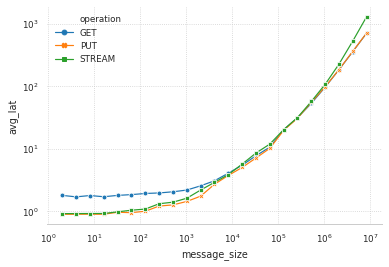

In [16]:
fig, ax = plt.subplots()
sns.set_context('paper')
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})
sns.despine(left=True)

# rembrandt_ts.rename(columns={"Max. Latency in us": "Max. (Prototype)", "Avg. Latency in us": "Avg. (Prototype)", "Min. Latency in us": "Min. (Prototype)"}, inplace=True)
# rembrandt_ts = rembrandt_ts.melt(id_vars="index", value_vars=["Max. (Prototype)", "Avg. (Prototype)"])
# kafka_ts.rename(columns={"Max. Latency in us": "Max. (Kafka)", "Avg. Latency in us": "Avg. (Kafka)", "Min. Latency in us": "Min. (Kafka)"}, inplace=True)
# kafka_ts = kafka_ts.melt(id_vars="index", value_vars=["Max. (Kafka)", "Avg. (Kafka)"])
# g = sns.lineplot(x="index", y="Max. Latency in us", data=kafka_ts, ax=ax)
# g = sns.lineplot(x="index", y="Avg. Latency in us", data=kafka_ts, ax=ax)
# g = sns.lineplot(x="index", y="Min. Latency in us", data=kafka_ts, ax=ax)
g = sns.lineplot(x="message_size", y="avg_lat", hue="operation", style="operation", markers=True, dashes=False, data=latency_df, ax=ax)
# g = sns.lineplot(x="index", y="value", hue="variable", data=rembrandt_ts, ax=ax, palette="Blues")
# g = sns.lineplot(x="index", y="Max. Latency in us", data=rembrandt_ts, ax=ax)
# g = sns.lineplot(x="index", y="Avg. Latency in us", data=rembrandt_ts, ax=ax)
# g = sns.lineplot(x="index", y="Min. Latency in us", data=rembrandt_ts, ax=ax)
# xlabels = ['{:,.0f}'.format(x) + ' K' for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# # g.set_xlabel("Message Size")
# g.set_ylabel("Publish Latency (μs)")
# g.set_xlabel("Message Index")
# ax.set_yscale('log')
# g.set_xticks([8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608])
# g.set_xticklabels(['8K','16K','32K','64K','128K','256K','512K','1M', '2M', '4M', '8M'])
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:3] + handles[4:], labels=labels[1:3] + labels[4:], ncol=1, bbox_to_anchor=(0.75, 0.5), fontsize="small")
# plt.xticks(rotation=45)
#     plt.yticks(fontsize=20)
ax.set(xscale="log", yscale="log")
fig.savefig("latency", bbox_inches="tight", dpi=600)
plt.show()